In [9]:
import tensorflow as tf
from __future__ import division
import cv2 
import numpy as np
import glob
import csv
import os
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [10]:
# Mengambil data fitur CSV ke dalam DataFrame
csv_filename = 'hsv_final_features.csv'
df = pd.read_csv(csv_filename)

# Pisahkan label dan fitur
X = df[['Mean_Hue', 'Mean_Saturation', 'Mean_Value']]
y = df['Class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM classifier
svm_classifier = SVC(kernel='rbf', gamma='scale', C=1.0)  # You can adjust kernel, gamma, and C parameters as needed

# Train the SVM classifier
svm_classifier.fit(X_train, y_train)

# Predict the labels for the test set
y_pred_svm = svm_classifier.predict(X_test)

# Evaluate the SVM classifier
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print(f"SVM Classifier Accuracy: {svm_accuracy:.2f}")


SVM Classifier Accuracy: 0.89


Confusion Matrix:
[[35  0  0  0  0]
 [ 0 14  1  3  0]
 [ 0  0 28  0  3]
 [ 7  1  0 28  0]
 [ 0  0  2  0 31]]


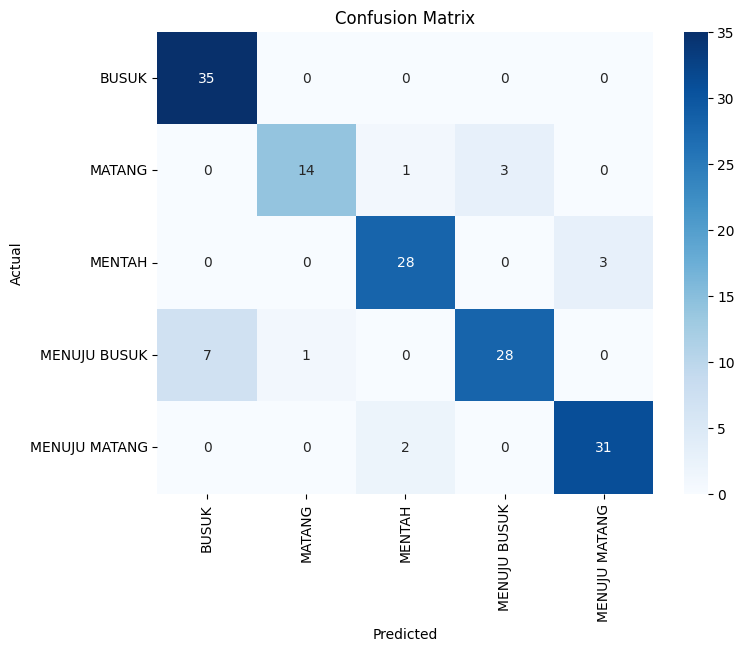

Accuracy: 88.89%
Precision: 89.26%
Recall: 88.89%
F1 Score: 88.70%


In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=knn_classifier.classes_, yticklabels=knn_classifier.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')


In [15]:
model_filename = 'SVM_model.pkl'
joblib.dump(svm_classifier, model_filename)

print(f"SVM model saved to {model_filename}")

SVM model saved to SVM_model.pkl


In [13]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel types to try
    'C': [0.1, 1.0, 10.0],  # Regularization parameter values
    'gamma': ['scale', 'auto'],  # Gamma values for 'rbf' and 'poly' kernels
}

svm_grid_search = GridSearchCV(SVC(), param_grid, cv=5)

svm_grid_search.fit(X_train, y_train)

best_params = svm_grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_svm_classifier = SVC(**best_params)
best_svm_classifier.fit(X_train, y_train)

y_pred_best_svm = best_svm_classifier.predict(X_test)

best_svm_accuracy = accuracy_score(y_test, y_pred_best_svm)
print(f"Best SVM Classifier Accuracy: {best_svm_accuracy:.2f}")

Best Hyperparameters: {'C': 10.0, 'gamma': 'auto', 'kernel': 'rbf'}
Best SVM Classifier Accuracy: 0.97


Confusion Matrix:
[[32  1  0  2  0]
 [ 0 18  0  0  0]
 [ 0  0 31  0  0]
 [ 2  0  0 34  0]
 [ 0  0  0  0 33]]


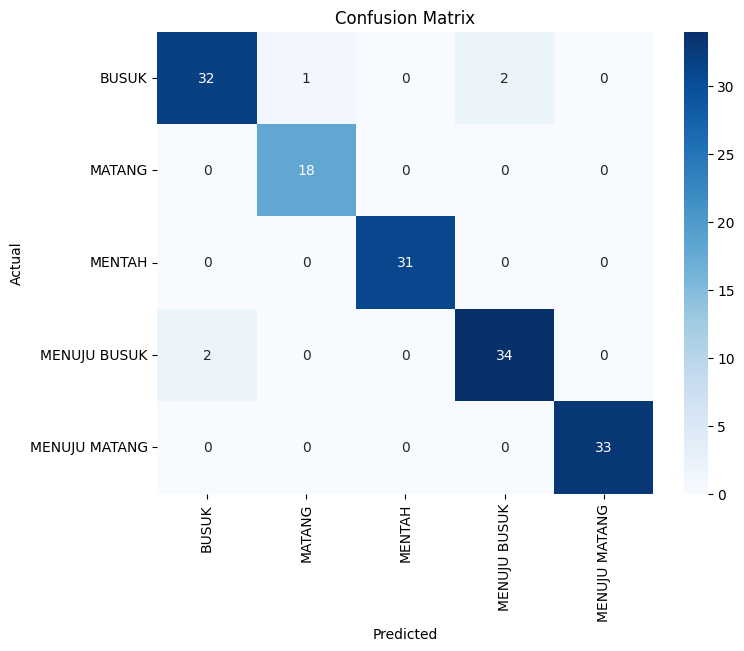

Accuracy: 96.73%
Precision: 96.73%
Recall: 96.73%
F1 Score: 96.72%


In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error

# Make predictions on the test set
y_pred = best_svm_classifier.predict(X_test)

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=knn_classifier.classes_, yticklabels=knn_classifier.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')
